<center> 

# Processing the results and preparing visuals

## Preparations

In [4]:
# Loading libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pathlib

import tensorflow as tf
import tf_utils as tfu
import albumentations as A

In [5]:
# Parameters
IMG_SIZE = (224, 224)
FPATH = 'D:/Master thesis/saved_models/'
SEED = 1
np.random.seed(SEED)
tf.random.set_seed(SEED)

In [6]:
# List and select models
model_paths = list(pathlib.Path(FPATH).glob('*'))
print(f"{'No.':<3}\t{'Model':<33}\t{'Test acc.':<10}\t{'Nature acc.':<10}")
for i, p in enumerate(model_paths):
    info = tfu.load_json(str(p) + '/info.json')
    print(f"{i:<3}\t{p.name:<33}\t{info['test_accuracy']:<10.8f}\t{info['nature_accuracy']:<10.8f}")

print()

for i, p in enumerate(model_paths):
    print(i, p.name)

No.	Model                            	Test acc. 	Nature acc.
0  	InceptionV3_(2023-04-07)_0       	0.97460938	0.86956525
1  	InceptionV3_(2023-04-08)_0       	0.97916669	0.85507250
2  	InceptionV3_(2023-04-08)_1       	0.97981775	0.84057975
3  	InceptionV3_aug100_(2023-05-10)_1	0.95949537	0.77536231
4  	InceptionV3_aug100_(2023-05-13)_0	0.96414346	0.81159425
5  	InceptionV3_aug100_(2023-05-14)_0	0.96281540	0.84057975
6  	InceptionV3_aug20_(2023-05-11)_0 	0.96613550	0.86956525
7  	InceptionV3_aug20_(2023-05-12)_0 	0.96879154	0.83333337
8  	InceptionV3_aug20_(2023-05-15)_0 	0.96945554	0.83333337
9  	InceptionV3_aug40_(2023-05-11)_2 	0.97742367	0.86956525
10 	InceptionV3_aug40_(2023-05-12)_0 	0.96746349	0.84057975
11 	InceptionV3_aug40_(2023-05-15)_0 	0.97078359	0.89855075
12 	InceptionV3_aug60_(2023-05-11)_0 	0.97410363	0.86956525
13 	InceptionV3_aug60_(2023-05-13)_0 	0.96281540	0.81159425
14 	InceptionV3_aug60_(2023-05-14)_0 	0.97543162	0.85507250
15 	InceptionV3_aug80_(2023-05-10)_0 	0

In [13]:
butterfly_labels = list(map(lambda x: x.name, pathlib.Path('kaggle dataset').glob('*')))
butterfly_labels

['adelpha iphiclus',
 'aglais io',
 'aglais milberti',
 'anaea aidea',
 'anartia fatima',
 'anthocharis cardamines',
 'astraptes fulgerator',
 'battus philenor',
 'caleta elna',
 'callophrys niphon',
 'carterocephalus palaemon',
 'cercyonis pegala',
 'chlosyne janais',
 'colias philodice',
 'danaus gilippus',
 'danaus plexippus',
 'diaethria anna',
 'dryadula phaetusa',
 'dryas iulia',
 'epargyreus clarus',
 'euchloe ausonia',
 'euchloe ausonides',
 'eumaeus atala',
 'euphaedra neophron',
 'euploea midamus',
 'eurema nicippe',
 'favonius quercus',
 'gonepteryx cleopatra',
 'graphium eurypylus',
 'hamadryas amphinome',
 'hasora schoenherr',
 'heliconius charithonia',
 'heliconius melpomene',
 'hesperopsis alpheus',
 'hypolimnas bolina',
 'hypolimnas misippus',
 'idea leuconoe',
 'iphiclides podalirius',
 'kallima inachus',
 'libytheana carinenta',
 'limenitis archippus',
 'limenitis arthemis',
 'lycaena arota',
 'lycaena helloides',
 'lysandra bellargus',
 'megisto cymela',
 'mestra hyp

## Training results and models comparison

In [4]:
data = []
for p in model_paths:
    data.append(tfu.load_json(str(p) + '/info.json'))

df = pd.DataFrame(data)
df.head()

date      duration         name  batch_size  seed  epochs  \
0   2023-04-07  13646.801086  InceptionV3          32   123     100   
1   2023-04-08  10844.241937  InceptionV3          32  2603     100   
2   2023-04-08  11901.610812  InceptionV3          32  2107     100   
3   2023-05-10  17245.859299  InceptionV3          32   123     100   
4   2023-05-13  10201.319981  InceptionV3          32  2107     100   
5   2023-05-14  12205.703543  InceptionV3          32  2603     100   
6   2023-05-11  17915.900000  InceptionV3          32   123     100   
7   2023-05-12  10704.428077  InceptionV3          32  2107     100   
8   2023-05-15  16222.850317  InceptionV3          32  2603     100   
9   2023-05-11  10487.299597  InceptionV3          32   123     100   
10  2023-05-12  10498.575076  InceptionV3          32  2107     100   
11  2023-05-15  11033.785837  InceptionV3          32  2603     100   
12  2023-05-11   6021.300000  InceptionV3          32   123     100   
13  2023-05-13  10741.896322  InceptionV3          32  2107     100   
14  2023-05-14  10678.183944  InceptionV3          32  2603     100   
15  2023-05-10   8581.300000  InceptionV3          32   123     100   
16  2023-05-13  10935.329759  InceptionV3          32  2107     100   
17  2023-05-14  10206.993747  InceptionV3          32  2603     100   
18  2023-03-24  67005.594858  MobileNetV2          32   123     100   
19  2023-03-23   8664.782271    MobileNet          32   123     100   
20  2023-04-09   8092.606012    MobileNet          32  2603     100   
21  2023-04-09   8128.494370    MobileNet          32  2107     100   
22  2023-05-17   8597.222469    MobileNet          32   123     100   
23  2023-05-17   8497.298411    MobileNet          32  2107     100   
24  2023-05-20   8677.444275    MobileNet          32  2603     100   
25  2023-05-15   8083.315552    MobileNet          32   123     100   
26  2023-05-18   8528.885977    MobileNet          32  2107     100   
27  2023-05-19   8252.622189    MobileNet          32  2603     100   
28  2023-05-16   8145.057151    MobileNet          32   123     100   
29  2023-05-18   8559.408009    MobileNet          32  2107     100   
30  2023-05-19   8470.298561    MobileNet          32  2603     100   
31  2023-05-16   7946.861507    MobileNet          32   123     100   
32  2023-05-18   8507.060470    MobileNet          32  2107     100   
33  2023-05-19   8345.327372    MobileNet          32  2603     100   
34  2023-05-16   7978.172571    MobileNet          32   123     100   
35  2023-05-17   8192.405753    MobileNet          32  2107     100   
36  2023-05-19   8731.821127    MobileNet          32  2603     100   
37  2023-03-25  27420.117421   ResNet50v2          32   123     100   
38  2023-04-09  13460.164387   ResNet50v2          32  2107     100   
39  2023-04-10  12949.442341   ResNet50v2          32  2603     100   
40  2023-03-22  11135.328214       ResNet          32   123      50   
41  2023-03-20   9182.725999        VGG16          32   123     100   
42  2023-04-10   9452.116480        VGG16          32  2603     100   
43  2023-04-10   9417.368353        VGG16          32  2107     100   
44  2023-03-20  11790.862979        VGG19          32   123     100   
45  2023-04-11  30544.126576        VGG19          32  2107     100   
46  2023-04-12  12763.951042        VGG19          32  2603     100   

    test_accuracy  test_loss  nature_accuracy  nature_loss  \
0        0.974609   0.173897         0.869565     0.589765   
1        0.979167   0.183128         0.855072     0.621252   
2        0.979818   0.234210         0.840580     0.719924   
3        0.959495   0.251787         0.775362     1.562837   
4        0.964143   0.408086         0.811594     1.300563   
5        0.962815   0.249340         0.840580     1.572949   
6        0.966136   0.205977         0.869565     0.559358   
7        0.968792   0.330261         0.833333     1.251417   
8        0.969456   0.226894         0.8333

In [10]:
df.nature_confusion[0]

[[nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan],
 [0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0

In [12]:
dic = {c: np.zeros((75,75)) for c in df.name.unique()}
butterfly_labels

for i, row in df.iterrows():
    dic[row['name']] += np.array(row['test_confusion'])



## Influence of image quality

In [4]:
img = plt.imread('kaggle dataset/nymphalis antiopa/0005.jpg')

In [5]:
plt.rcParams.update({'font.size': 16})
sns.set_style('whitegrid')
sns.set(font_scale=2)

### Brightness

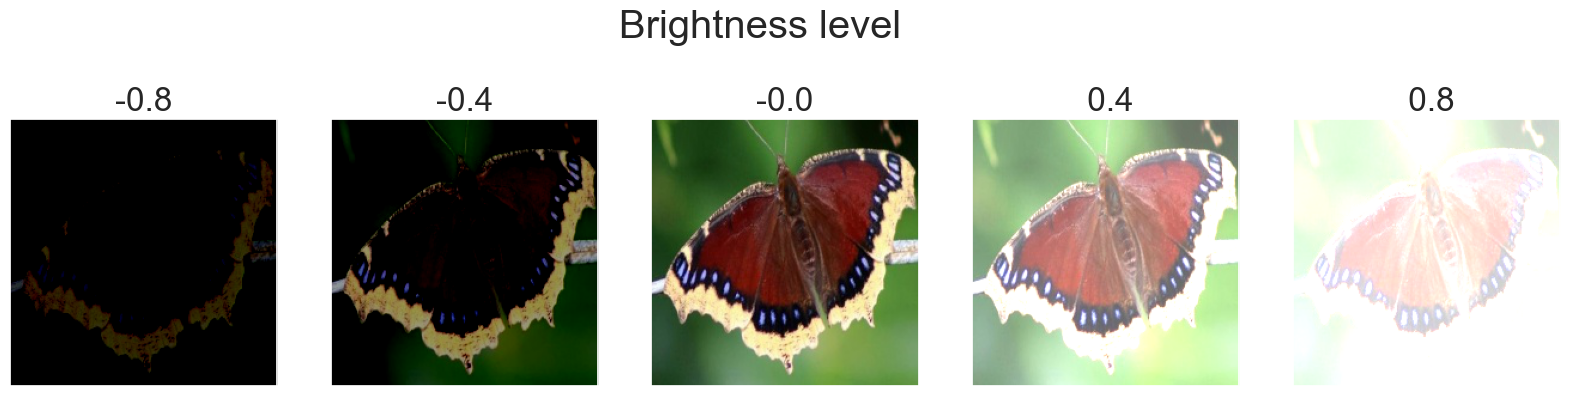

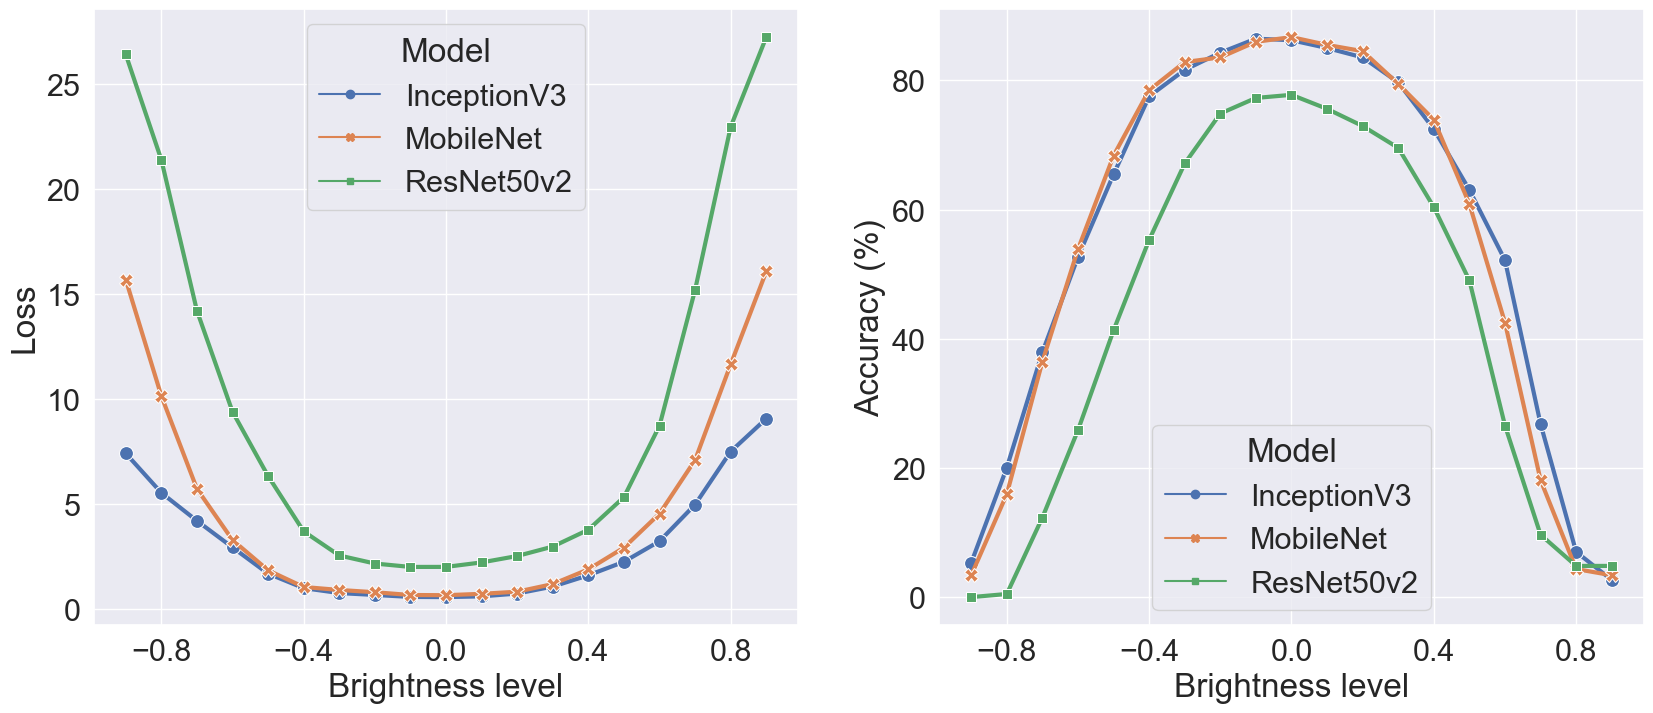

In [64]:
name = 'brightness'

df = pd.read_csv('image quality results/' + name + '.csv')
parameters = df[name].unique()[1::4]
df['accuracy'] *= 100

fig, axes = plt.subplots(1, 5)
fig.set_size_inches(20,5)
for i in range(5):
    p = parameters[i]
    new_img = tfu.transform_image(img, A.RandomBrightnessContrast(brightness_limit=(p, p), 
                                                                  contrast_limit=(0,0), 
                                                                  always_apply=True))
    axes[i].imshow(new_img)
    axes[i].set_xticks([])
    axes[i].set_yticks([])
    axes[i].set_title(f'{p: 1.1f}')

plt.suptitle('Brightness level')
plt.show()

fig, axes = plt.subplots(1, 2)
fig.set_size_inches(20,8)

sns.lineplot(
    data=df, 
    x=name, 
    y='loss', 
    hue='model',
    style='model',
    dashes=False,
    markers=True,
    markersize=10, 
    errorbar=None,
    linewidth=3, 
    ax=axes[0])

sns.lineplot(
    data=df, 
    x=name,
    y='accuracy',
    hue='model',
    style='model',
    dashes=False,
    markers=True,
    markersize=10, 
    errorbar=None,
    linewidth=3, 
    ax=axes[1])

axes[0].set_xlabel('Brightness level')
axes[1].set_xlabel('Brightness level')

axes[0].set_ylabel('Loss')
axes[1].set_ylabel('Accuracy (%)')

axes[0].legend(title='Model')
axes[1].legend(title='Model')

axes[0].set_xticks(parameters)
axes[1].set_xticks(parameters)

plt.show()


### Contrast

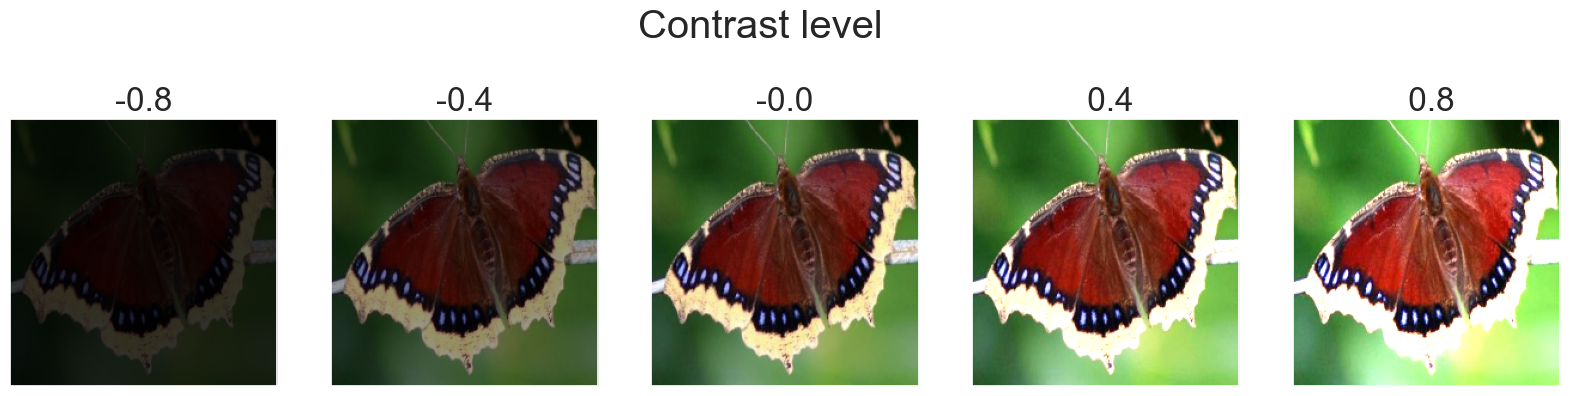

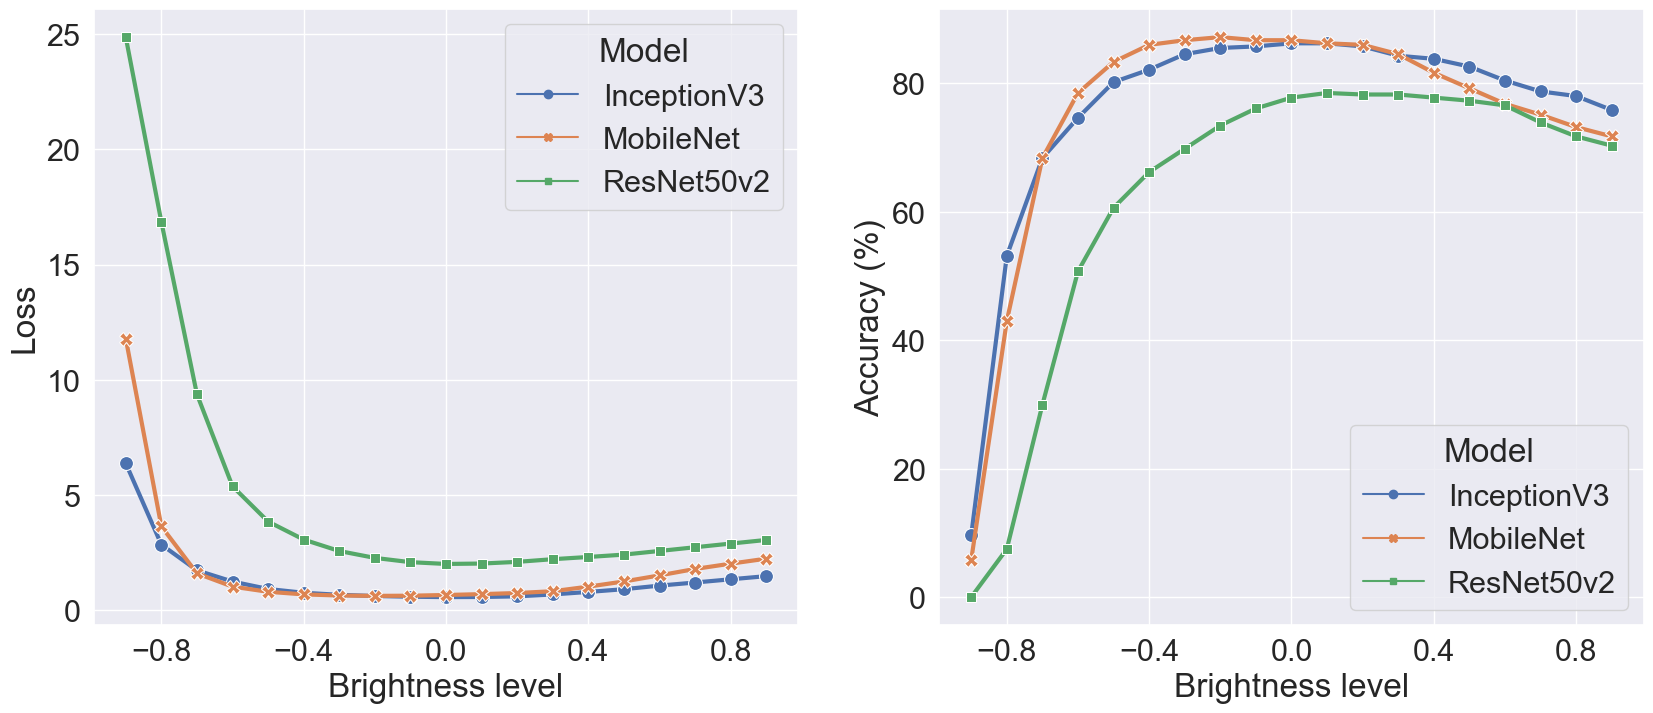

In [66]:
name = 'contrast'

df = pd.read_csv('image quality results/' + name + '.csv')
parameters = df[name].unique()[1::4]
df['accuracy'] *= 100

fig, axes = plt.subplots(1, 5)
fig.set_size_inches(20,5)
for i in range(5):
    p = parameters[i]
    new_img = tfu.transform_image(img, A.RandomBrightnessContrast(brightness_limit=(0, 0), 
                                                                  contrast_limit=(p, p), 
                                                                  always_apply=True))
    axes[i].imshow(new_img)
    axes[i].set_xticks([])
    axes[i].set_yticks([])
    axes[i].set_title(f'{p: 1.1f}')

plt.suptitle('Contrast level')
plt.show()

fig, axes = plt.subplots(1, 2)
fig.set_size_inches(20,8)

sns.lineplot(
    data=df, 
    x=name, 
    y='loss', 
    hue='model',
    style='model',
    dashes=False,
    markers=True,
    markersize=10, 
    errorbar=None,
    linewidth=3, 
    ax=axes[0])

sns.lineplot(
    data=df, 
    x=name,
    y='accuracy',
    hue='model',
    style='model',
    dashes=False,
    markers=True,
    markersize=10, 
    errorbar=None,
    linewidth=3, 
    ax=axes[1])

axes[0].set_xlabel('Contrast level')
axes[1].set_xlabel('Contrast level')

axes[0].set_ylabel('Loss')
axes[1].set_ylabel('Accuracy (%)')

axes[0].legend(title='Model')
axes[1].legend(title='Model')

axes[0].set_xticks(parameters)
axes[1].set_xticks(parameters)

plt.show()


### Gamma correction

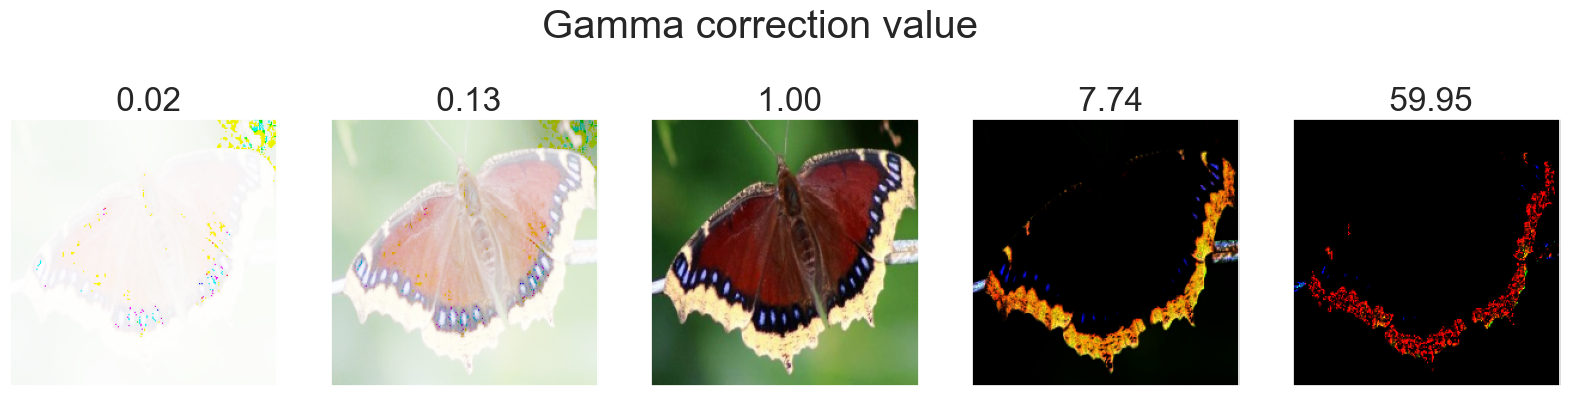

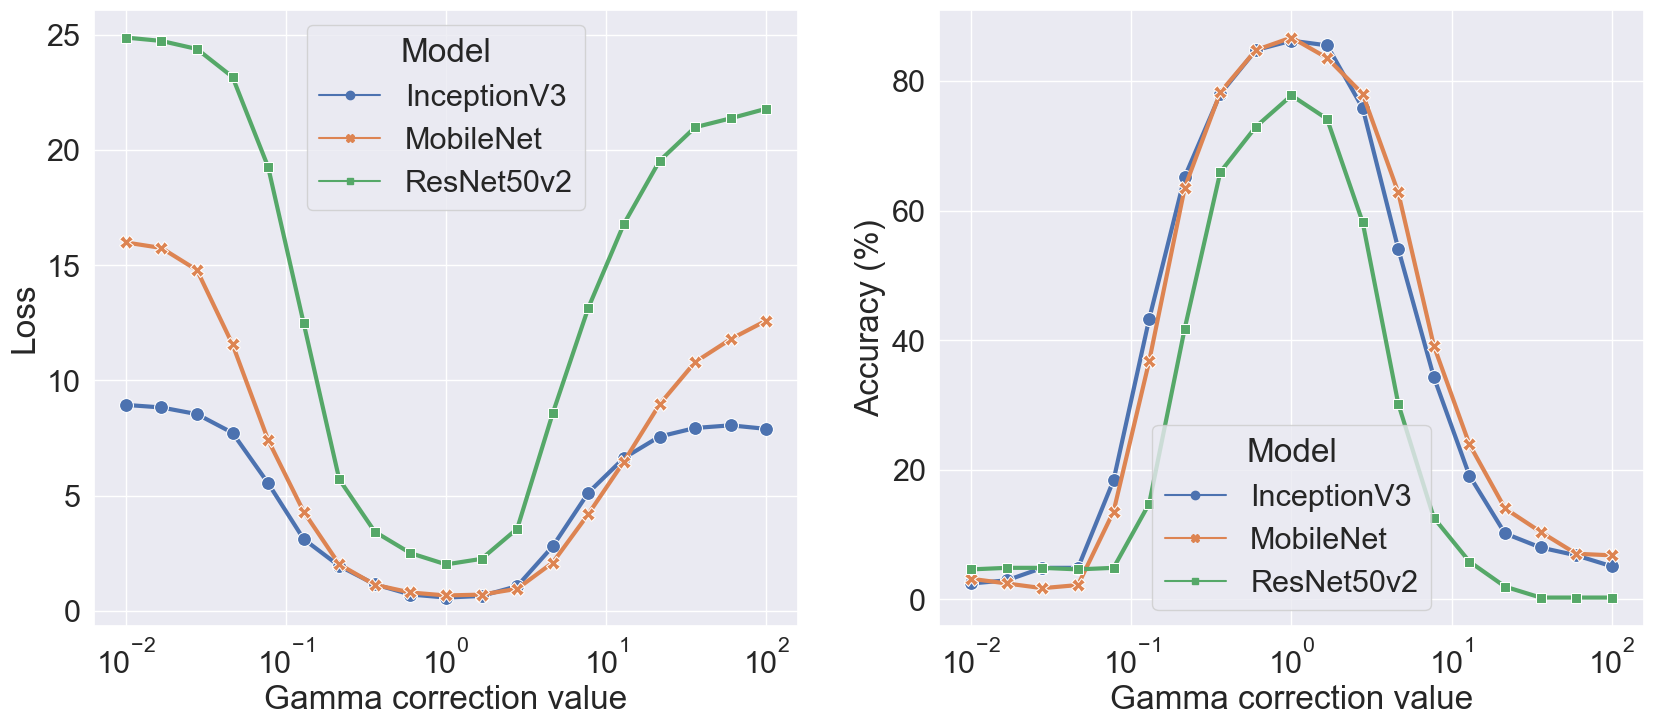

In [81]:
name = 'gamma'
label = 'Gamma correction value'

df = pd.read_csv('image quality results/' + name + '.csv')
parameters = df[name].unique()[1::4]
df['accuracy'] *= 100

fig, axes = plt.subplots(1, 5)
fig.set_size_inches(20,5)
for i in range(5):
    p = parameters[i] * 100
    new_img = tfu.transform_image(img, A.RandomGamma(gamma_limit=(p, p), always_apply=True))
    axes[i].imshow(new_img)
    axes[i].set_xticks([])
    axes[i].set_yticks([])
    axes[i].set_title(f'{p/100: .2f}')

plt.suptitle(label)
plt.show()

fig, axes = plt.subplots(1, 2)
fig.set_size_inches(20,8)

sns.lineplot(
    data=df, 
    x=name, 
    y='loss', 
    hue='model',
    style='model',
    dashes=False,
    markers=True,
    markersize=10, 
    errorbar=None,
    linewidth=3, 
    ax=axes[0])

sns.lineplot(
    data=df, 
    x=name,
    y='accuracy',
    hue='model',
    style='model',
    dashes=False,
    markers=True,
    markersize=10, 
    errorbar=None,
    linewidth=3, 
    ax=axes[1])

axes[0].set_xlabel(label)
axes[1].set_xlabel(label)

axes[0].set_ylabel('Loss')
axes[1].set_ylabel('Accuracy (%)')

axes[0].legend(title='Model')
axes[1].legend(title='Model')

axes[0].set_xscale('log')
axes[1].set_xscale('log')

plt.show()


### Gaussian noise

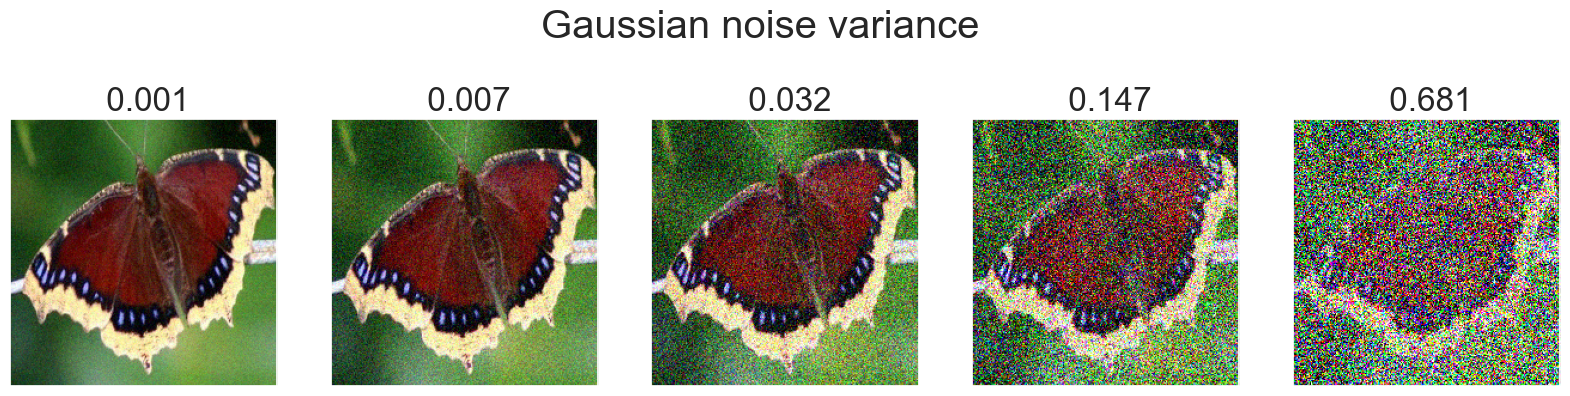

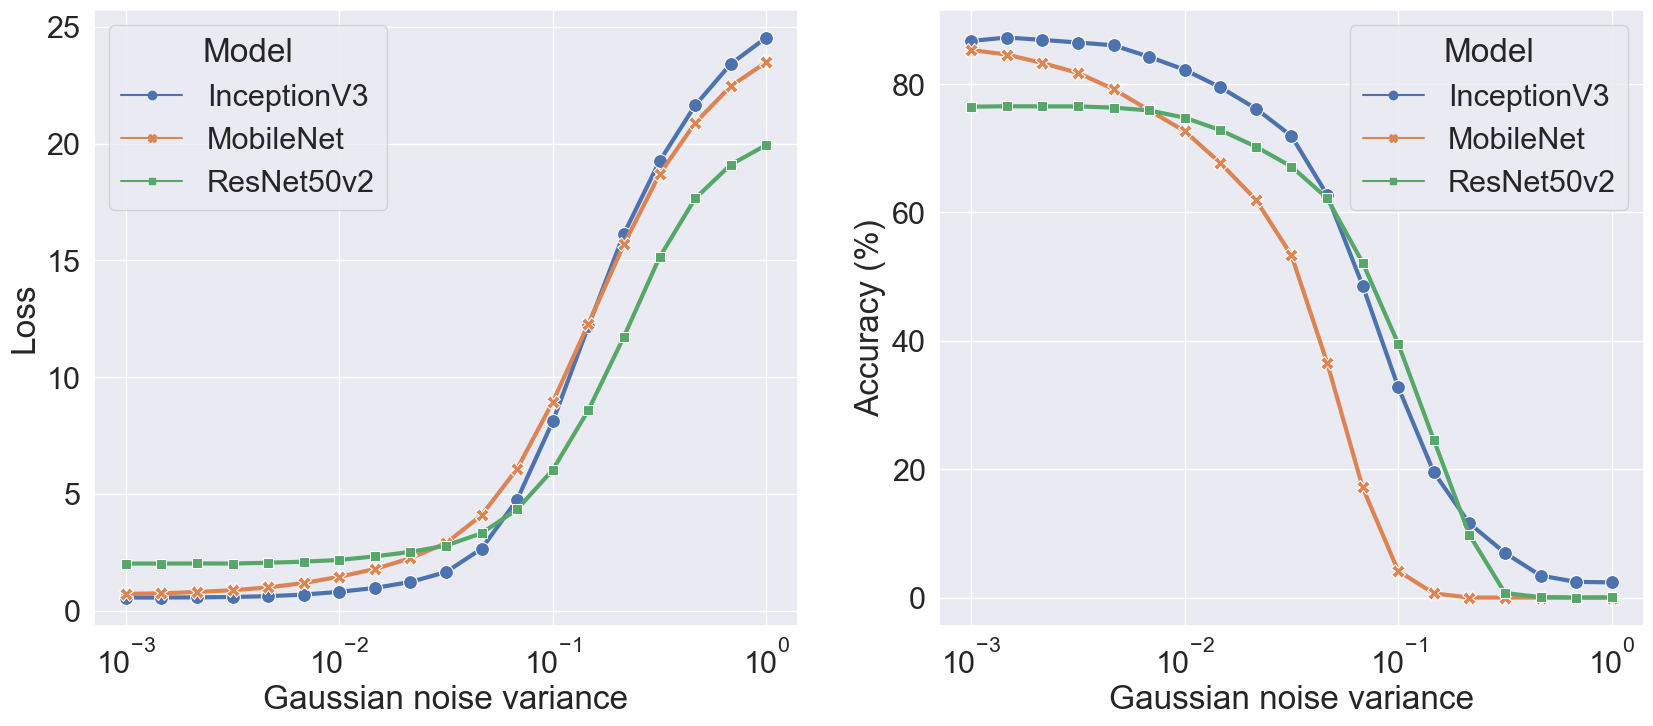

In [79]:
name = 'gauss_noise'
label = 'Gaussian noise variance'

df = pd.read_csv('image quality results/' + name + '.csv')
parameters = df[name].unique()[1::4]
df['accuracy'] *= 100

fig, axes = plt.subplots(1, 5)
fig.set_size_inches(20,5)
for i in range(5):
    p = parameters[i]
    new_img = tfu.transform_image(img/255, A.GaussNoise(var_limit=(p, p), always_apply=True))
    axes[i].imshow(new_img)
    axes[i].set_xticks([])
    axes[i].set_yticks([])
    axes[i].set_title(f'{p: .3f}')

plt.suptitle(label)
plt.show()

fig, axes = plt.subplots(1, 2)
fig.set_size_inches(20,8)

sns.lineplot(
    data=df, 
    x=name, 
    y='loss', 
    hue='model',
    style='model',
    dashes=False,
    markers=True,
    markersize=10, 
    errorbar=None,
    linewidth=3, 
    ax=axes[0])

sns.lineplot(
    data=df, 
    x=name,
    y='accuracy',
    hue='model',
    style='model',
    dashes=False,
    markers=True,
    markersize=10, 
    errorbar=None,
    linewidth=3, 
    ax=axes[1])

axes[0].set_xlabel(label)
axes[1].set_xlabel(label)

axes[0].set_ylabel('Loss')
axes[1].set_ylabel('Accuracy (%)')

axes[0].legend(title='Model')
axes[1].legend(title='Model')

axes[0].set_xscale('log')
axes[1].set_xscale('log')

plt.show()


### Gaussian blur

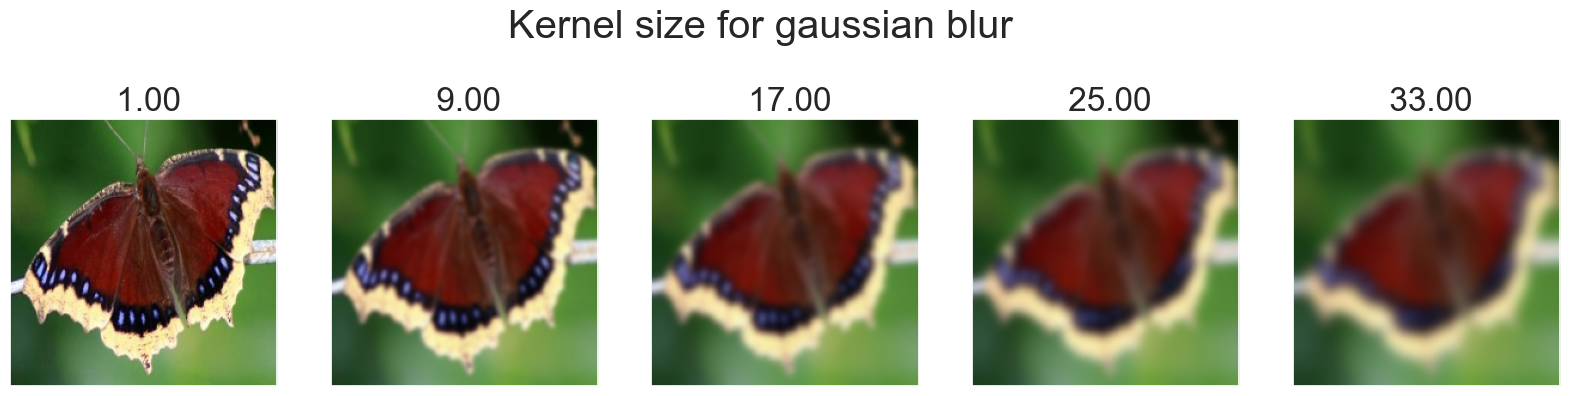

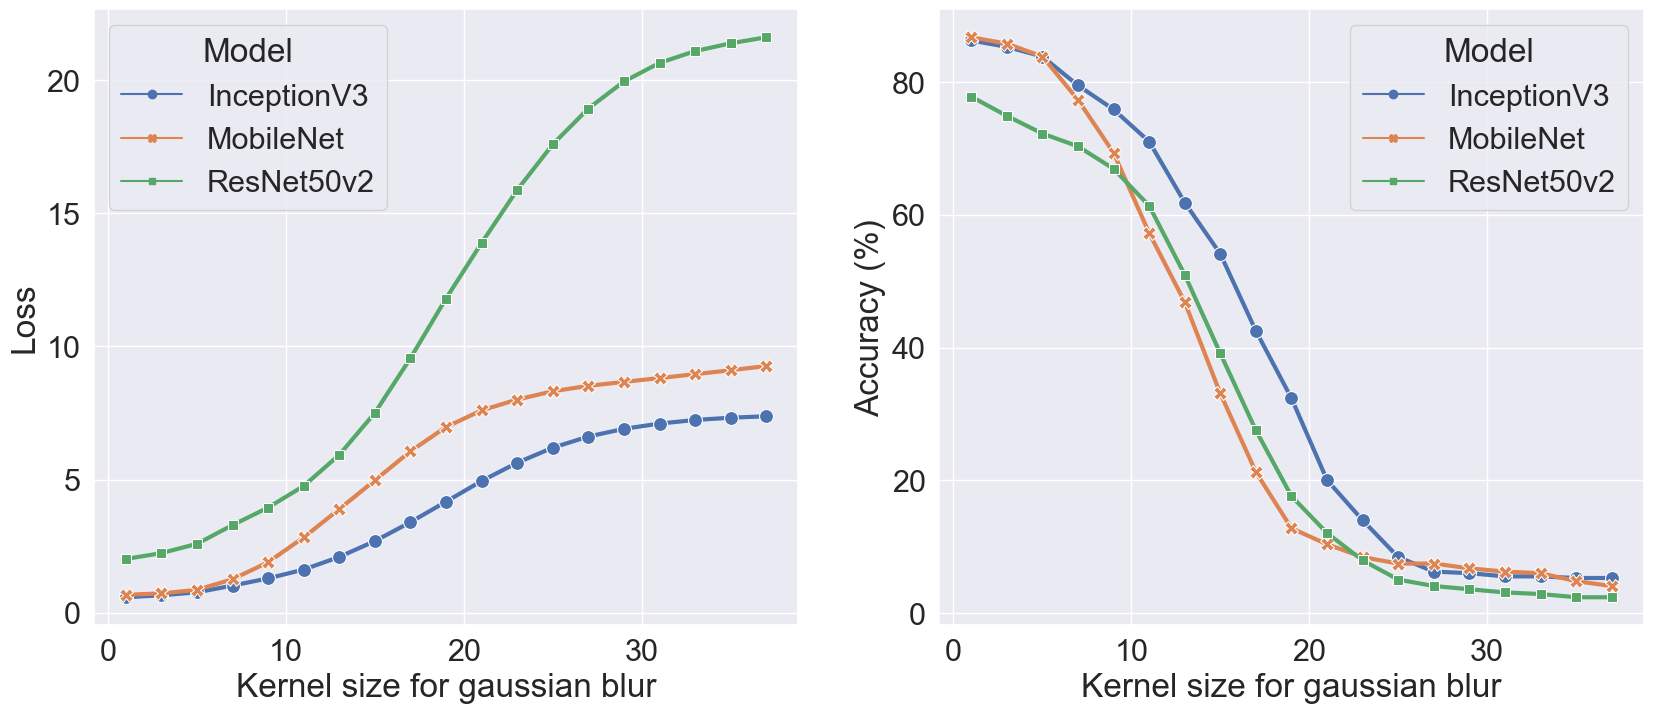

In [85]:
name = 'gauss_blur'
label = 'Kernel size for gaussian blur'

df = pd.read_csv('image quality results/' + name + '.csv')
parameters = df[name].unique()[0::4]
df['accuracy'] *= 100

fig, axes = plt.subplots(1, 5)
fig.set_size_inches(20,5)
for i in range(5):
    p = parameters[i]
    new_img = tfu.transform_image(img, A.GaussianBlur(blur_limit=(p, p), always_apply=True))
    axes[i].imshow(new_img)
    axes[i].set_xticks([])
    axes[i].set_yticks([])
    axes[i].set_title(f'{p: .2f}')

plt.suptitle(label)
plt.show()

fig, axes = plt.subplots(1, 2)
fig.set_size_inches(20,8)

sns.lineplot(
    data=df, 
    x=name, 
    y='loss', 
    hue='model',
    style='model',
    dashes=False,
    markers=True,
    markersize=10, 
    errorbar=None,
    linewidth=3, 
    ax=axes[0])

sns.lineplot(
    data=df, 
    x=name,
    y='accuracy',
    hue='model',
    style='model',
    dashes=False,
    markers=True,
    markersize=10, 
    errorbar=None,
    linewidth=3, 
    ax=axes[1])

axes[0].set_xlabel(label)
axes[1].set_xlabel(label)

axes[0].set_ylabel('Loss')
axes[1].set_ylabel('Accuracy (%)')

axes[0].legend(title='Model')
axes[1].legend(title='Model')

plt.show()


### Motion blur

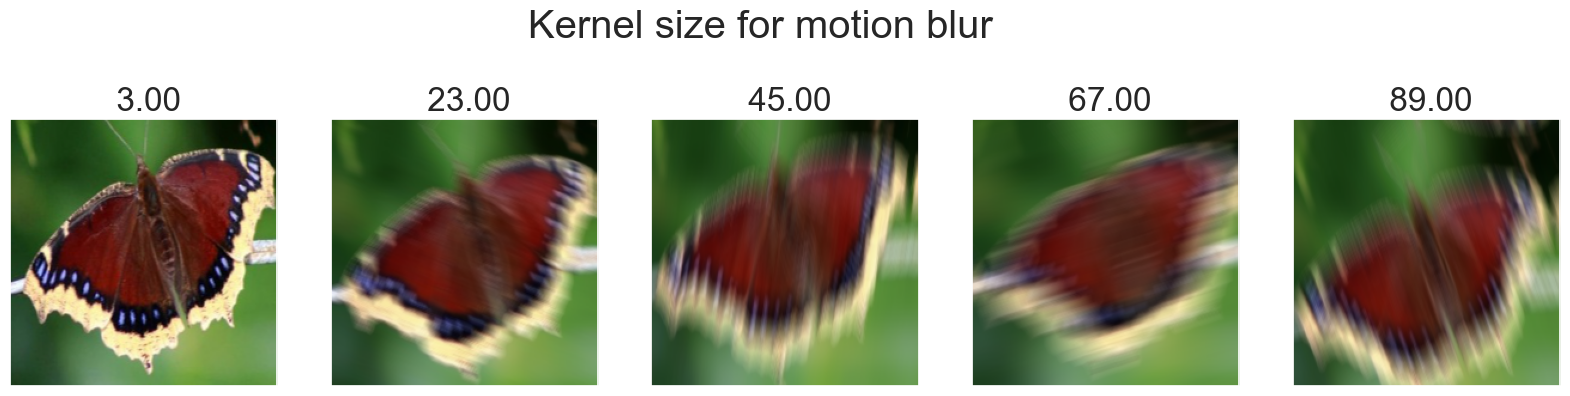

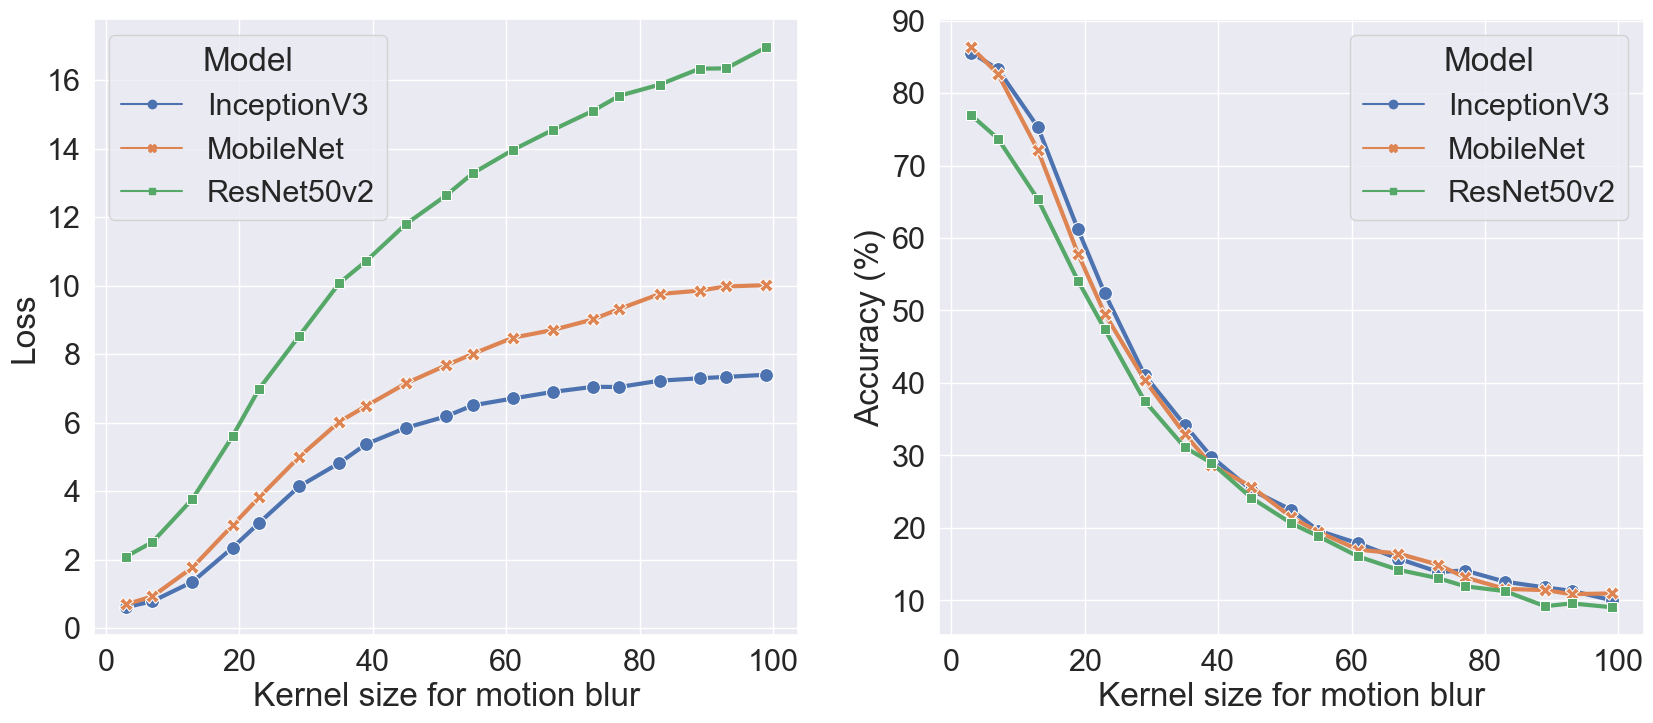

In [86]:
name = 'motion_blur'
label = 'Kernel size for motion blur'

df = pd.read_csv('image quality results/' + name + '.csv')
parameters = df[name].unique()[0::4]
df['accuracy'] *= 100

fig, axes = plt.subplots(1, 5)
fig.set_size_inches(20,5)
for i in range(5):
    p = parameters[i]
    new_img = tfu.transform_image(img, A.MotionBlur(blur_limit=(p, p), always_apply=True))
    axes[i].imshow(new_img)
    axes[i].set_xticks([])
    axes[i].set_yticks([])
    axes[i].set_title(f'{p: .2f}')

plt.suptitle(label)
plt.show()

fig, axes = plt.subplots(1, 2)
fig.set_size_inches(20,8)

sns.lineplot(
    data=df, 
    x=name, 
    y='loss', 
    hue='model',
    style='model',
    dashes=False,
    markers=True,
    markersize=10, 
    errorbar=None,
    linewidth=3, 
    ax=axes[0])

sns.lineplot(
    data=df, 
    x=name,
    y='accuracy',
    hue='model',
    style='model',
    dashes=False,
    markers=True,
    markersize=10, 
    errorbar=None,
    linewidth=3, 
    ax=axes[1])

axes[0].set_xlabel(label)
axes[1].set_xlabel(label)

axes[0].set_ylabel('Loss')
axes[1].set_ylabel('Accuracy (%)')

axes[0].legend(title='Model')
axes[1].legend(title='Model')

plt.show()

### Image compression

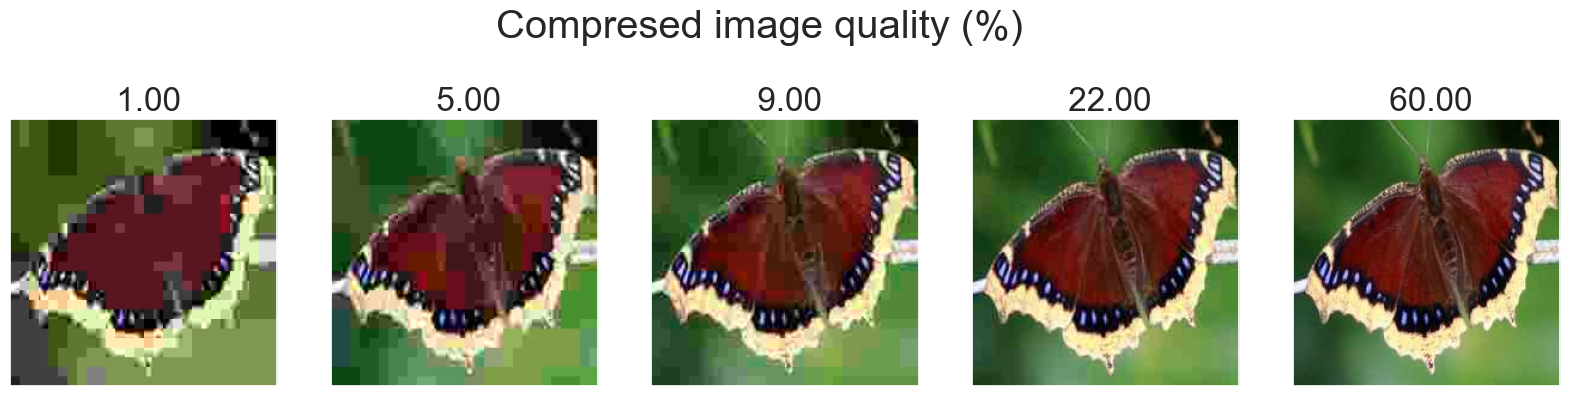

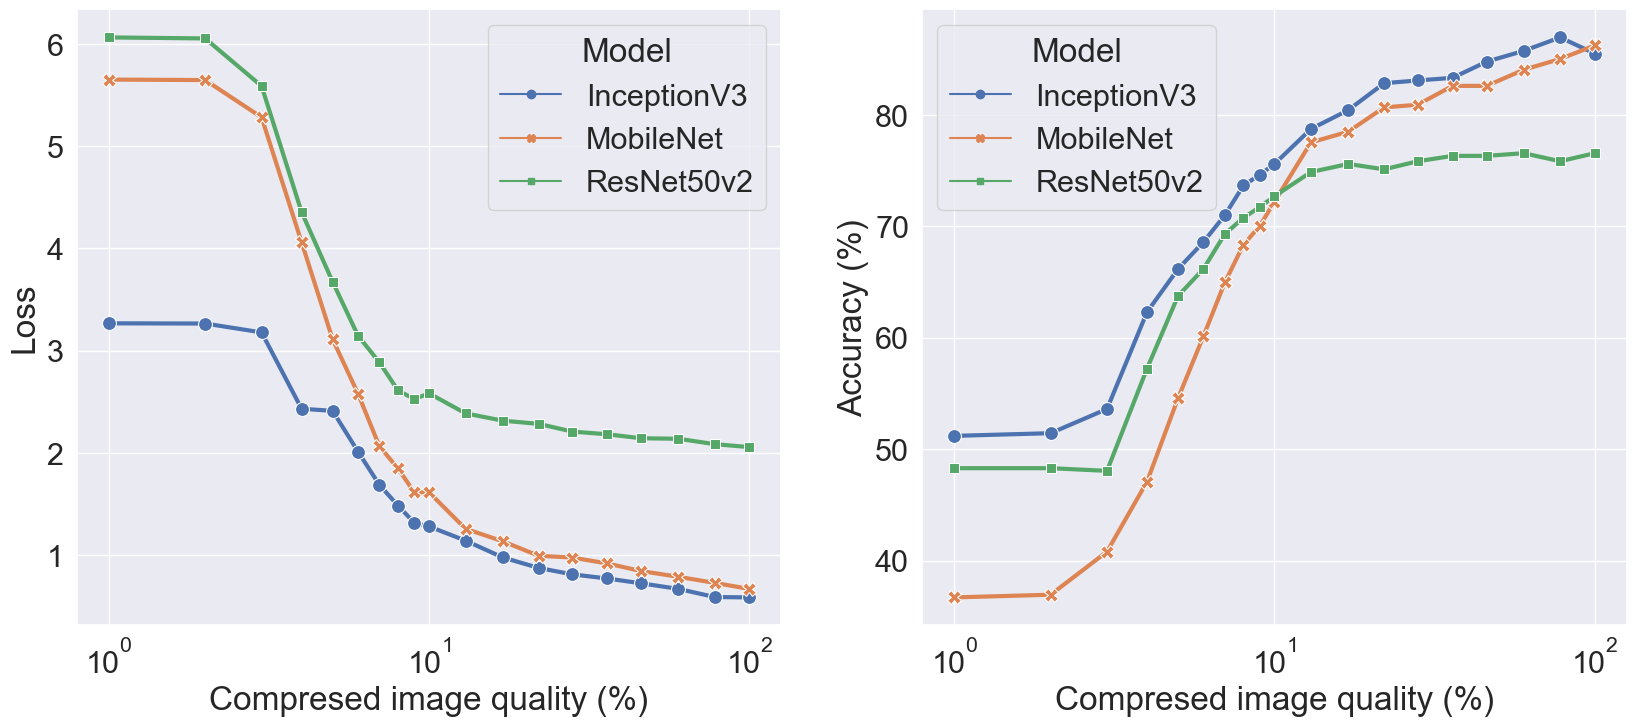

In [6]:
name = 'img_compression'
label = 'Compresed image quality (%)'

df = pd.read_csv('image quality results/' + name + '.csv')
parameters = df[name].unique()[0::4]
df['accuracy'] *= 100

fig, axes = plt.subplots(1, 5)
fig.set_size_inches(20,5)
for i in range(5):
    p = parameters[i]
    new_img = tfu.transform_image(img, A.ImageCompression(quality_lower=p, quality_upper=p, always_apply=True))
    axes[i].imshow(new_img)
    axes[i].set_xticks([])
    axes[i].set_yticks([])
    axes[i].set_title(f'{p: .2f}')

plt.suptitle(label)
plt.show()

fig, axes = plt.subplots(1, 2)
fig.set_size_inches(20,8)

sns.lineplot(
    data=df, 
    x=name, 
    y='loss', 
    hue='model',
    style='model',
    dashes=False,
    markers=True,
    markersize=10, 
    errorbar=None,
    linewidth=3, 
    ax=axes[0])

sns.lineplot(
    data=df, 
    x=name,
    y='accuracy',
    hue='model',
    style='model',
    dashes=False,
    markers=True,
    markersize=10, 
    errorbar=None,
    linewidth=3, 
    ax=axes[1])

axes[0].set_xlabel(label)
axes[1].set_xlabel(label)

axes[0].set_ylabel('Loss')
axes[1].set_ylabel('Accuracy (%)')

axes[0].legend(title='Model')
axes[1].legend(title='Model')

axes[0].set_xscale('log')
axes[1].set_xscale('log')
plt.show()


### Downscaling

c:\Users\Admin\anaconda3\envs\tf_direct\lib\site-packages\albumentations\augmentations\transforms.py:1554: UserWarning: Using default interpolation INTER_NEAREST, which is sub-optimal.Please specify interpolation mode for downscale and upscale explicitly.For additional information see this PR https://github.com/albumentations-team/albumentations/pull/584
  warnings.warn(


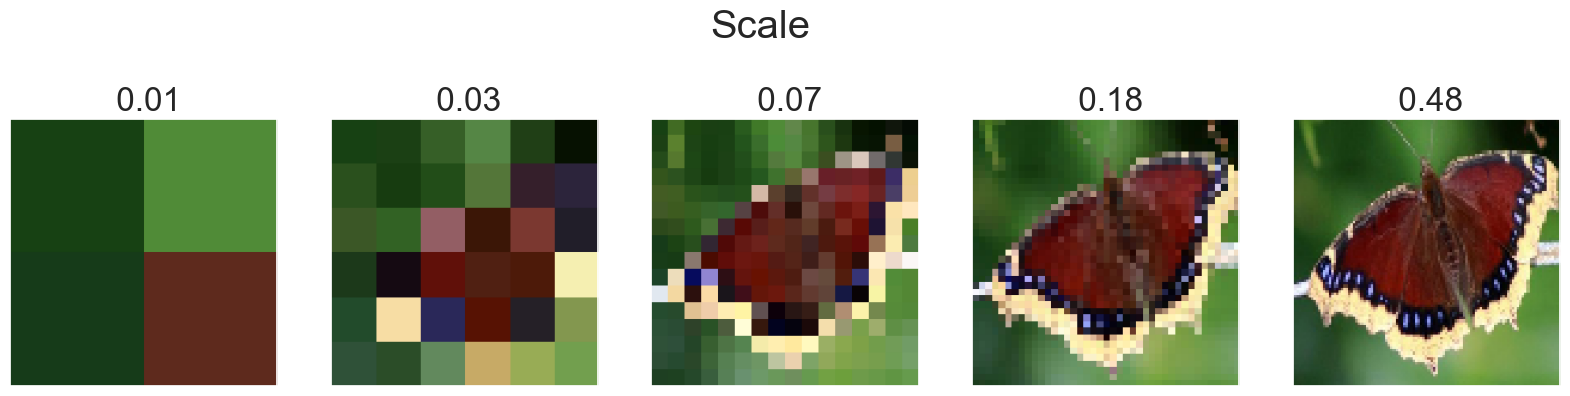

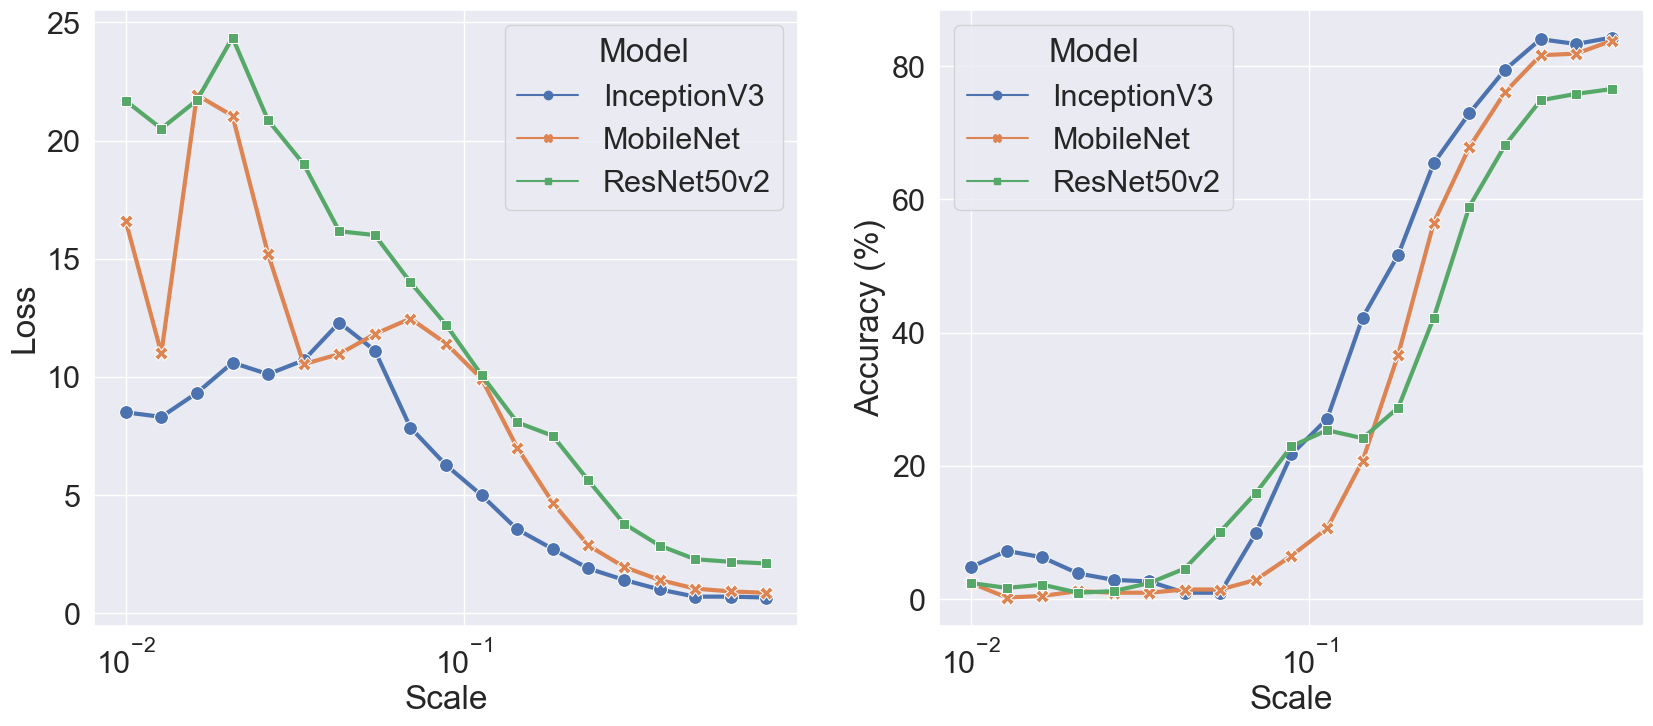

In [91]:
name = 'downscale'
label = 'Scale'

df = pd.read_csv('image quality results/' + name + '.csv')
parameters = df[name].unique()[0::4]
df['accuracy'] *= 100

fig, axes = plt.subplots(1, 5)
fig.set_size_inches(20,5)
for i in range(5):
    p = parameters[i]
    new_img = tfu.transform_image(img, A.Downscale(scale_max=p, scale_min=p, always_apply=True))
    axes[i].imshow(new_img)
    axes[i].set_xticks([])
    axes[i].set_yticks([])
    axes[i].set_title(f'{p: .2f}')

plt.suptitle(label)
plt.show()

fig, axes = plt.subplots(1, 2)
fig.set_size_inches(20,8)

sns.lineplot(
    data=df, 
    x=name, 
    y='loss', 
    hue='model',
    style='model',
    dashes=False,
    markers=True,
    markersize=10, 
    errorbar=None,
    linewidth=3, 
    ax=axes[0])

sns.lineplot(
    data=df, 
    x=name,
    y='accuracy',
    hue='model',
    style='model',
    dashes=False,
    markers=True,
    markersize=10, 
    errorbar=None,
    linewidth=3, 
    ax=axes[1])

axes[0].set_xlabel(label)
axes[1].set_xlabel(label)

axes[0].set_ylabel('Loss')
axes[1].set_ylabel('Accuracy (%)')

axes[0].legend(title='Model')
axes[1].legend(title='Model')

axes[0].set_xscale('log')
axes[1].set_xscale('log')

plt.show()


### Rotation

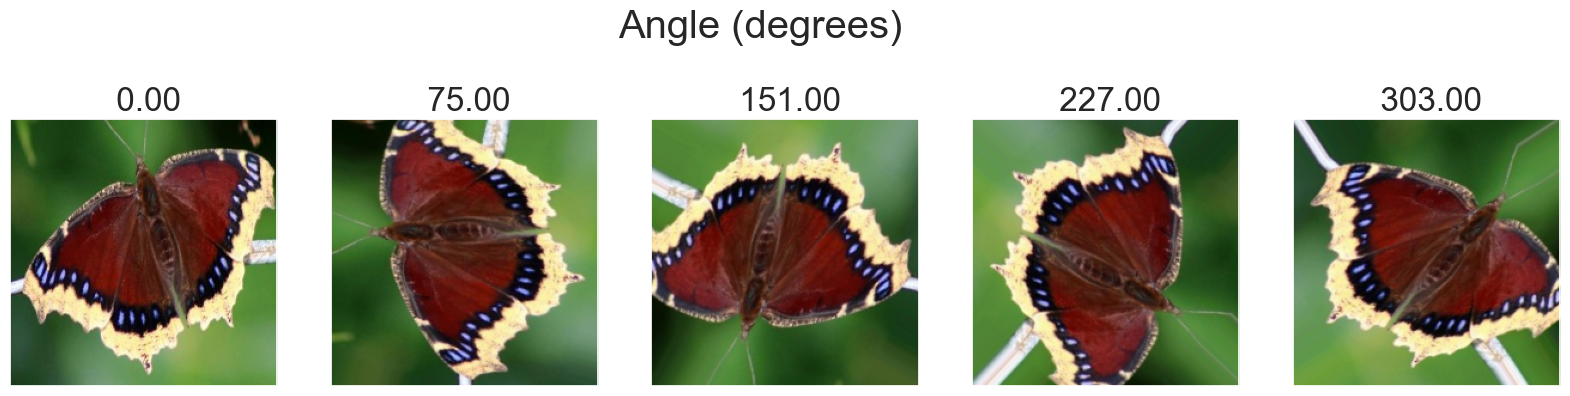

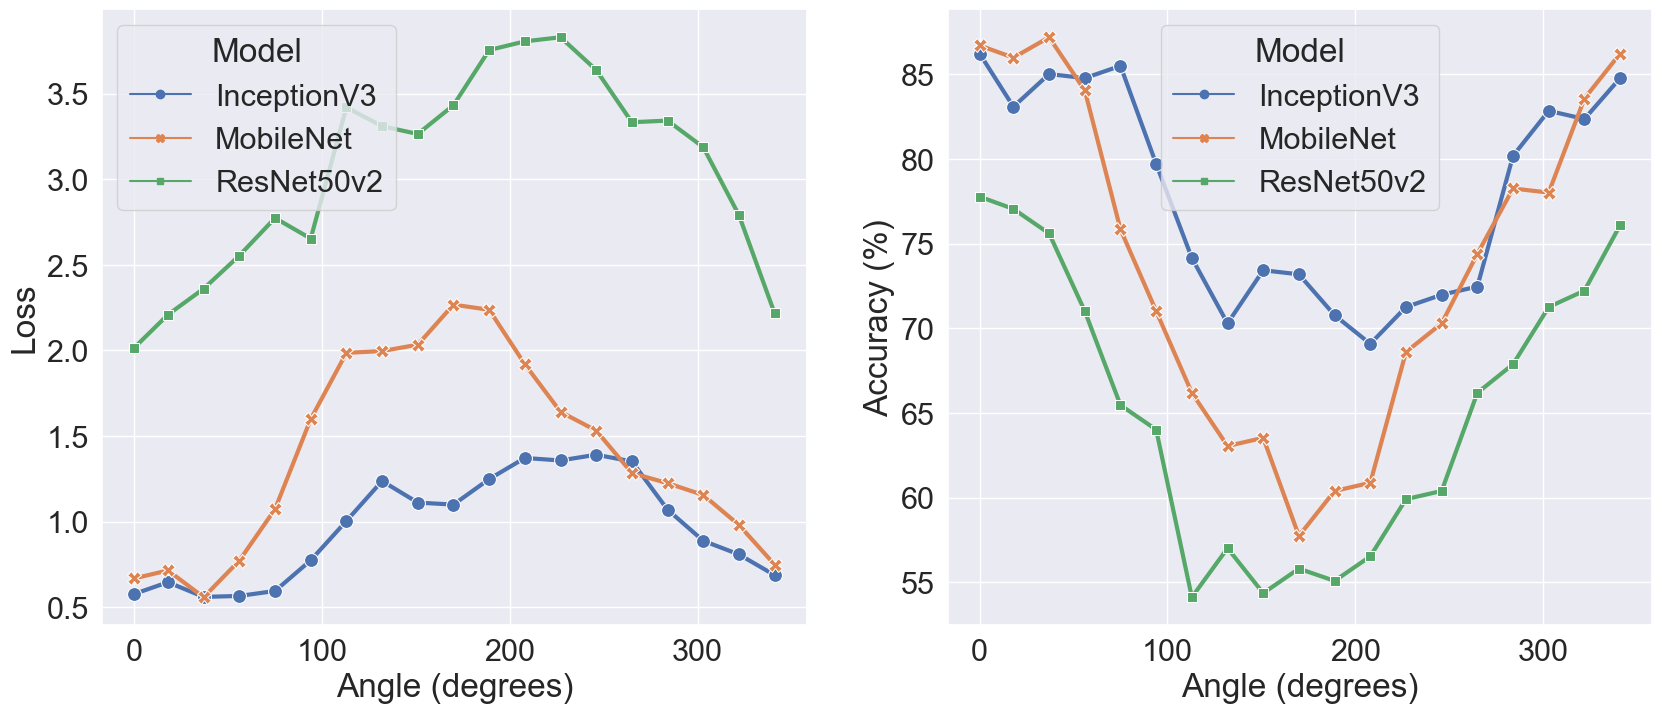

In [8]:
name = 'rotation'
label = 'Angle (degrees)'

df = pd.read_csv('image quality results/' + name + '.csv')
parameters = df[name].unique()[0::4]
df['accuracy'] *= 100

fig, axes = plt.subplots(1, 5)
fig.set_size_inches(20,5)
for i in range(5):
    p = parameters[i]
    from cv2 import BORDER_REPLICATE
    new_img = tfu.transform_image(img, A.Rotate(limit=(p, p), border_mode=BORDER_REPLICATE, always_apply=True))
    axes[i].imshow(new_img)
    axes[i].set_xticks([])
    axes[i].set_yticks([])
    axes[i].set_title(f'{p: .2f}')

plt.suptitle(label)
plt.show()

fig, axes = plt.subplots(1, 2)
fig.set_size_inches(20,8)

sns.lineplot(
    data=df, 
    x=name, 
    y='loss', 
    hue='model',
    style='model',
    dashes=False,
    markers=True,
    markersize=10, 
    errorbar=None,
    linewidth=3, 
    ax=axes[0])

sns.lineplot(
    data=df, 
    x=name,
    y='accuracy',
    hue='model',
    style='model',
    dashes=False,
    markers=True,
    markersize=10, 
    errorbar=None,
    linewidth=3, 
    ax=axes[1])

axes[0].set_xlabel(label)
axes[1].set_xlabel(label)

axes[0].set_ylabel('Loss')
axes[1].set_ylabel('Accuracy (%)')

axes[0].legend(title='Model')
axes[1].legend(title='Model')

plt.show()


## Augmentation

### Prediction accuracy

In [4]:
plt.rcParams.update({'font.size': 16})
sns.set_style('whitegrid')

In [129]:
data = []
for p in model_paths:
    info = tfu.load_json(str(p) + '/info.json')
    data.append({
        'Model' : info['name'],
        'Test accuracy' : info['test_accuracy'],
        'Nature accuracy': info['nature_accuracy'],
        'Test loss' : info['test_loss'],
        'Nature loss': info['nature_loss'],
        'Augmentation proportion' : info['augmentation']
    })

df = pd.DataFrame(data)
df = df[df['Model'].isin(['InceptionV3', 'MobileNet'])]
df.head()

Model  Test accuracy  Nature accuracy  Test loss  Nature loss  \
0  InceptionV3       0.974609         0.869565   0.173897     0.589765   
1  InceptionV3       0.979167         0.855072   0.183128     0.621252   
2  InceptionV3       0.979818         0.840580   0.234210     0.719924   
3  InceptionV3       0.959495         0.775362   0.251787     1.562837   
4  InceptionV3       0.964143         0.811594   0.408086     1.300563   

   Augmentation proportion  
0                      0.0  
1                      0.0  
2                      0.0  
3                      1.0  
4                      1.0

#### Plots

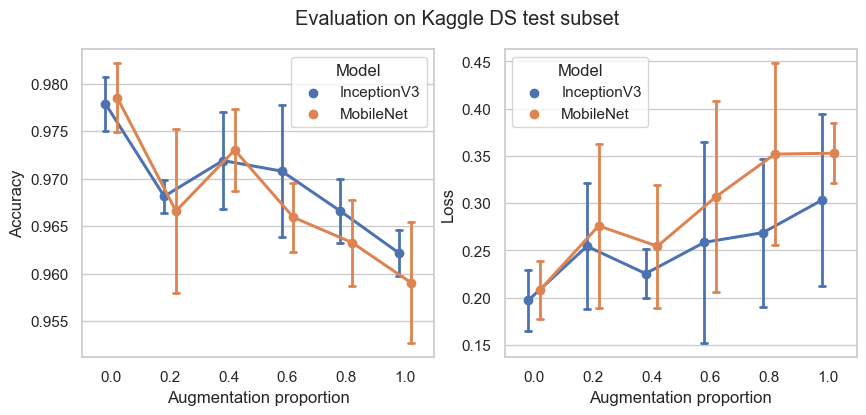

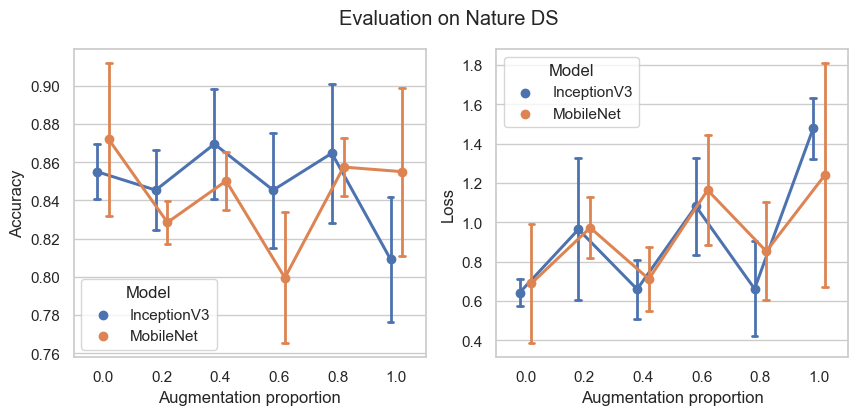

In [130]:
def plot(y, ax, ylabel=None, title=None, **seaborn_kwargs):
    sns.pointplot(
        df,
        x='Augmentation proportion',
        y=y,
        hue='Model',
        ax=ax,
        capsize=0.1,
        dodge=0.2,
        scale=0.8,
        errwidth=2,
        errorbar='sd',
        **seaborn_kwargs
    )
    if ylabel != None:
        ax.set_ylabel(ylabel)
    if title != None:
        ax.set_title(title)

fig, axes = plt.subplots(1, 2, figsize=(10,4))

plt.suptitle('Evaluation on Kaggle DS test subset')
plot('Test accuracy', axes[0], 'Accuracy')
plot('Test loss', axes[1], 'Loss')
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(10,4))

plt.suptitle('Evaluation on Nature DS')
plot('Nature accuracy', axes[0], 'Accuracy')
plot('Nature loss', axes[1], 'Loss')
plt.show()

#### Tables
1. Values frorm the plots
2. Relative changes (%)

In [131]:
df.groupby(['Model', 'Augmentation proportion']).agg(['mean','std'])

Test accuracy           Nature accuracy  \
                                             mean       std            mean   
Model       Augmentation proportion                                           
InceptionV3 0.0                          0.977865  0.002838        0.855072   
            0.2                          0.968128  0.001757        0.845411   
            0.4                          0.971890  0.005071        0.869565   
            0.6                          0.970784  0.006932        0.845411   
            0.8                          0.966578  0.003407        0.864734   
            1.0                          0.962151  0.002394        0.809179   
MobileNet   0.0                          0.978516  0.003625        0.871981   
            0.2                          0.966578  0.008666        0.828502   
            0.4                          0.972997  0.004269        0.850242   
            0.6                          0.965914  0.003657        0.799517   
            0.8                          0.963258  0.004520        0.857488   
            1.0                          0.959053  0.006381        0.855072   

                                              Test loss           Nature loss  \
                                          std      mean       std        mean   
Model       Augmentation proportion                                             
InceptionV3 0.0                      0.014493  0.197078  0.032487    0.643647   
            0.2                      0.020918  0.254377  0.066545    0.964568   
            0.4                      0.028986  0.225411  0.026136    0.660550   
            0.6                      0.030169  0.258482  0.106675    1.082048   
            0.8                      0.036473  0.268782  0.078239    0.662599   
            1.0                      0.032676  0.303071  0.090954    1.478783   
MobileNet   0.0                      0.039910  0.208071  0.031072    0.690175   
            0.2                      0.011069  0.275957  0.087037    0.973113   
            0.4                      0.015085  0.254377  0.064884    0.712307   
            0.6                      0.034245  0.306857  0.101137    1.164032   
            0.8                      0.015085  0.351856  0.096191    0.853165   
            1.0                      0.044078  0.352776  0.031827    1.241538   

                                               
                                          std  
Model       Augmentation proportion            
InceptionV3 0.0                      0.067908  
            0.2                      0.360892  
            0.4                      0.150046  
            0.6                      0.245602  
            0.8                      0.240918  
            1.0                      0.154426  
MobileNet   0.0                      0.303750  
            0.2                      0.154188  
            0.4                      0.162608  
            0.6                      0.279514  
            0.8                      0.248715  
            1.0                      0.567426

In [138]:
d = df[df['Augmentation proportion']==0].iloc[:,0:5].groupby('Model').mean()
(df.groupby(['Model','Augmentation proportion']).mean() - d) / d * 100

Test accuracy  Nature accuracy  \
Model       Augmentation proportion                                   
InceptionV3 0.0                           0.000000         0.000000   
            0.2                          -0.995749        -1.129943   
            0.4                          -0.610959         1.694915   
            0.6                          -0.724134        -1.129943   
            0.8                          -1.154194         1.129943   
            1.0                          -1.606889        -5.367232   
MobileNet   0.0                           0.000000         0.000000   
            0.2                          -1.219960        -4.986148   
            0.4                          -0.563988        -2.493074   
            0.6                          -1.287817        -8.310249   
            0.8                          -1.559253        -1.662049   
            1.0                          -1.989027        -1.939058   

                                     Test loss  Nature loss  
Model       Augmentation proportion                          
InceptionV3 0.0                       0.000000     0.000000  
            0.2                      29.074293    49.859809  
            0.4                      14.376518     2.626081  
            0.6                      31.157264    68.111998  
            0.8                      36.383621     2.944549  
            1.0                      53.781994   129.750639  
MobileNet   0.0                       0.000000     0.000000  
            0.2                      32.626372    40.995129  
            0.4                      22.255027     3.206661  
            0.6                      47.477165    68.657399  
            0.8                      69.103915    23.615736  
            1.0                      69.546368    79.887411

### Image quality influence

In [41]:
plt.rcParams.update({'font.size': 16})
sns.set(font_scale=1)
sns.set_style('whitegrid')

In [84]:
# Auxiliary functions
def load_dataframes(transformation_name):
    augs = np.linspace(0,100,6,dtype=int)
    dfs = [pd.read_csv(
        f'image quality results/{transformation_name}_aug{x}.csv',
        usecols=[2,3,4,5],
        converters={transformation_name: (lambda i: round(float(i),6))}) for x in augs]
    
    params = dfs[0][transformation_name].unique()

    dfs[0] = dfs[0][~dfs[0]['model'].str.contains('ResNet')]

    for df in dfs:
        df.set_index(transformation_name, inplace=True)
        df.columns = [c.capitalize() for c in df.columns]

    return params, dfs[0], dfs[1:]

def get_average_changes(df0, dfs, relative=False, percentages=False):
    data = []
    
    for aug, df in zip(np.linspace(0.2, 1.0, 5), dfs):
        scale = df0.groupby('Model').mean() if relative else 1
        scale = scale / 100 if percentages and relative else scale

        result = (df.groupby('Model').mean() - df0.groupby('Model').mean()) / scale

        for model in df['Model'].unique():
            data.append({
                'Augmentation proportion': round(aug, 1),
                'Loss': result.loc[model, 'Loss'],
                'Accuracy': result.loc[model, 'Accuracy'],
                'Model': model
            })
    return pd.DataFrame(data)

def plot_changes(df, y, ylabel=None, title=None, ax=None, percentages=False, **seaborn_kwargs):
    sns.barplot(df, x='Augmentation proportion', y=y, hue='Model', ax=ax, **seaborn_kwargs)
    if ylabel is not None:
        ax.set_ylabel(ylabel)
    if title is not None:
        ax.set_title(title)
    if percentages:
        ax.set_yticks(ax.get_yticks(), [f'{x:.0f}%' for x in ax.get_yticks()])
    
def plot_trajectories(df0, df1, aug, ax, xlabel=None, ylabel=None, title=None, xticks=None, scale='linear', **seaborn_kwargs):
    df = pd.concat([df0, df1])
    df['Augmentation\nproportion'] = [0.0] * df0.shape[0] + [aug] * df1.shape[0]

    sns.lineplot(
        df, 
        errorbar=None, 
        markers=True,
        style='Augmentation\nproportion', 
        hue='Model', 
        palette='deep', 
        **seaborn_kwargs)
    
    ax.set_xscale(scale)
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

    if xlabel is not None:
        ax.set_xlabel(xlabel)
    if ylabel is not None:
        ax.set_ylabel(ylabel)
    if title is not None:
        ax.set_title(title)
    if xticks is not None:
        ax.set_xticks(xticks)

#### Brightness

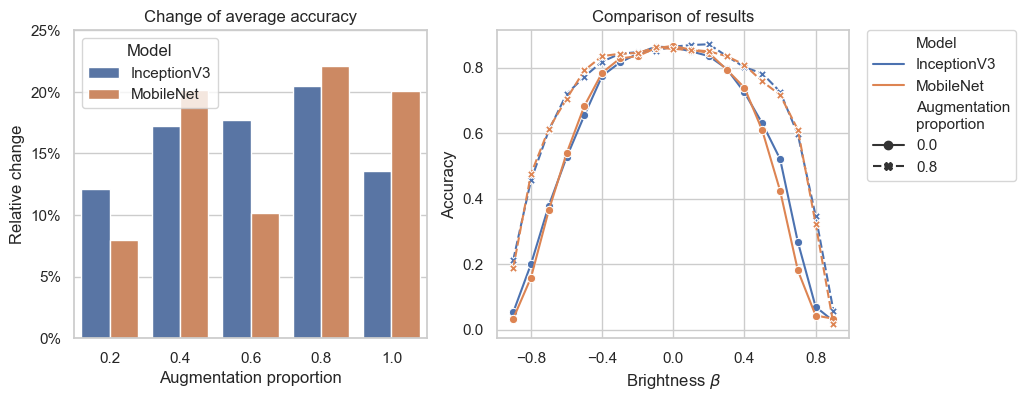

In [85]:
transformation_name = 'brightness'
parameters, df0, dfs = load_dataframes(transformation_name)

result_df = get_average_changes(df0, dfs, True, True)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
plot_changes(result_df, 'Accuracy', 'Relative change', 'Change of average accuracy', axes[0], True)
plot_trajectories(
    df0, 
    dfs[3], 
    0.8, 
    axes[1],  
    title='Comparison of results', 
    xlabel='Brightness $\\beta$',
    xticks= parameters[1::4],
    x=transformation_name, 
    y='Accuracy')
plt.show()

#### Contrast

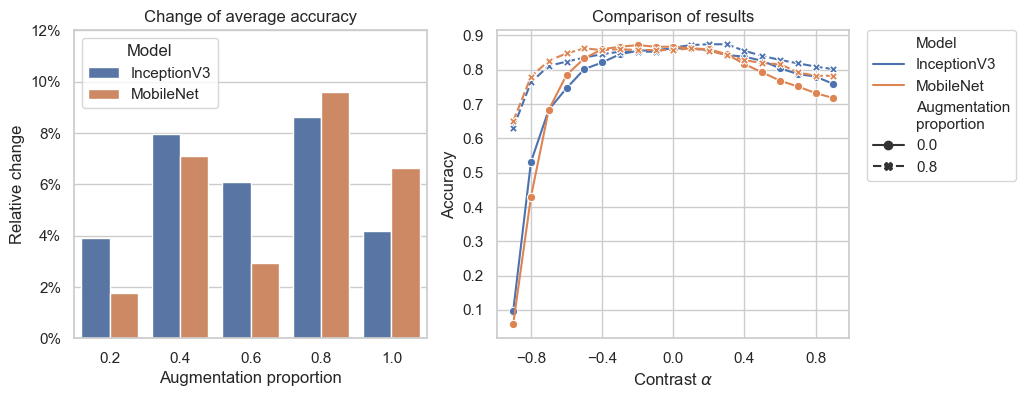

In [86]:
transformation_name = 'contrast'
parameters, df0, dfs = load_dataframes(transformation_name)

result_df = get_average_changes(df0, dfs, True, True)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
plot_changes(result_df, 'Accuracy', 'Relative change', 'Change of average accuracy', axes[0], True)
plot_trajectories(
    df0, 
    dfs[3], 
    0.8, 
    axes[1],  
    title='Comparison of results', 
    xlabel='Contrast $\\alpha$',
    xticks= parameters[1::4],
    x=transformation_name, 
    y='Accuracy')
plt.show()

#### Gamma correction

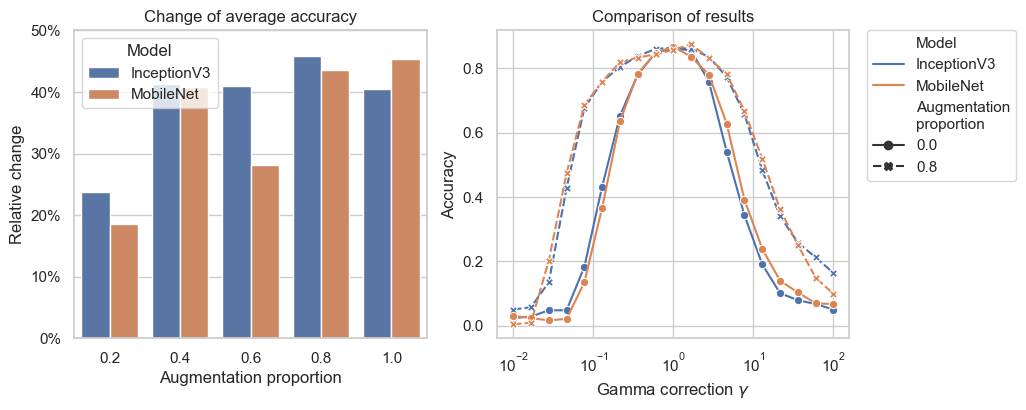

In [87]:
transformation_name = 'gamma'
parameters, df0, dfs = load_dataframes(transformation_name)

result_df = get_average_changes(df0, dfs, True, True)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
plot_changes(result_df, 'Accuracy', 'Relative change', 'Change of average accuracy', axes[0], True)
plot_trajectories(
    df0, 
    dfs[3], 
    0.8, 
    axes[1],  
    scale='log',
    title='Comparison of results', 
    xlabel='Gamma correction $\gamma$',
    x=transformation_name, 
    y='Accuracy')
plt.show()

#### Gaussian noise

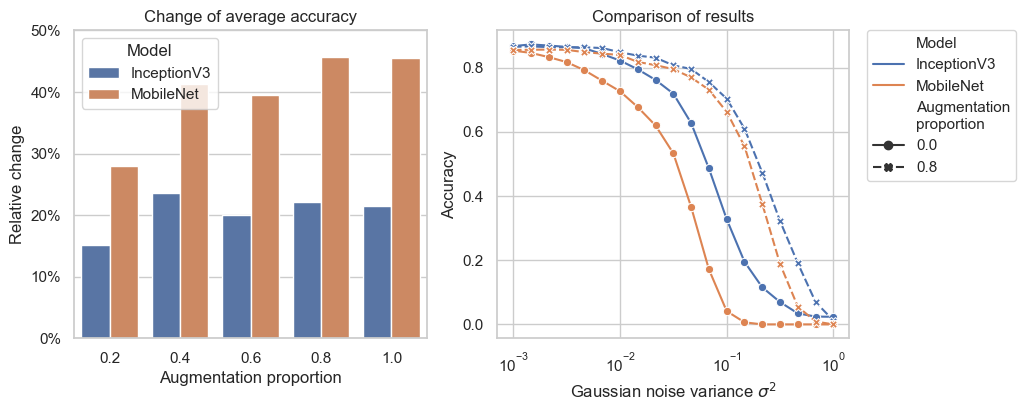

In [88]:
transformation_name = 'gauss_noise'
parameters, df0, dfs = load_dataframes(transformation_name)

result_df = get_average_changes(df0, dfs, True, True)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
plot_changes(result_df, 'Accuracy', 'Relative change', 'Change of average accuracy', axes[0], True)
plot_trajectories(
    df0, 
    dfs[3], 
    0.8, 
    axes[1],  
    scale='log',
    title='Comparison of results', 
    xlabel='Gaussian noise variance $\sigma^2$',
    x=transformation_name, 
    y='Accuracy')
plt.show()

#### Gaussian blur

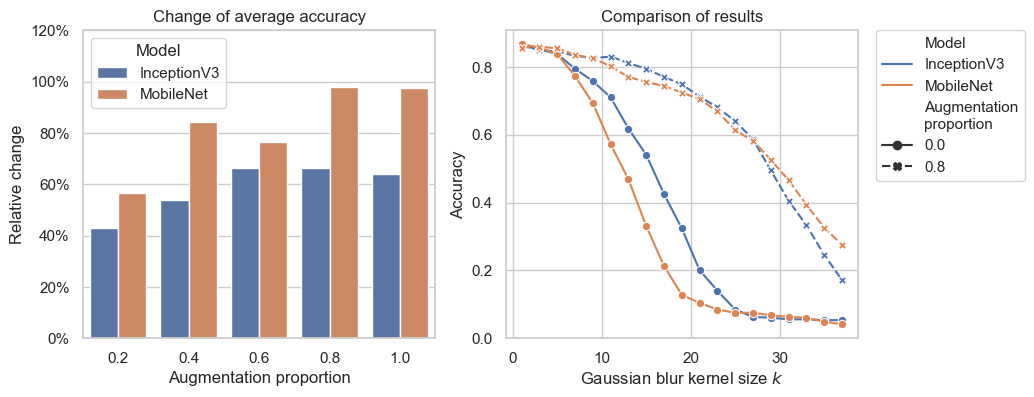

In [89]:
transformation_name = 'gauss_blur'
parameters, df0, dfs = load_dataframes(transformation_name)

result_df = get_average_changes(df0, dfs, True, True)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
plot_changes(result_df, 'Accuracy', 'Relative change', 'Change of average accuracy', axes[0], True)
plot_trajectories(
    df0, 
    dfs[3], 
    0.8, 
    axes[1],  
    title='Comparison of results', 
    xlabel='Gaussian blur kernel size $k$',
    x=transformation_name, 
    y='Accuracy')
plt.show()

#### Motion blur

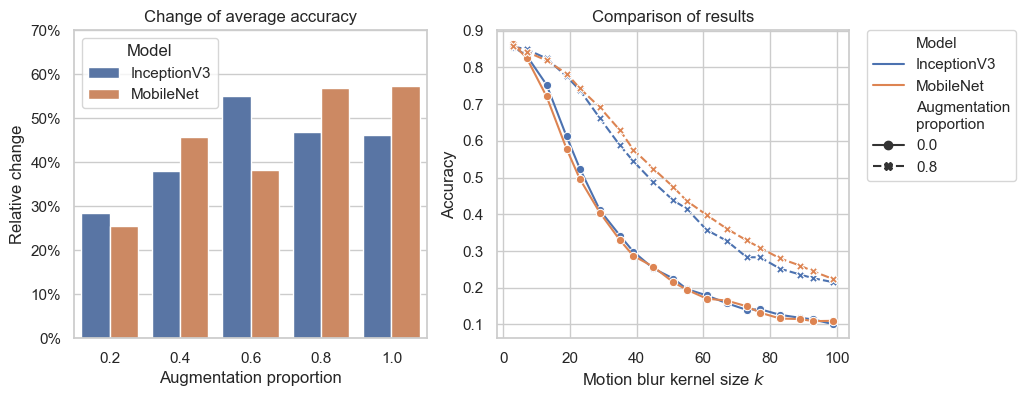

In [90]:
transformation_name = 'motion_blur'
parameters, df0, dfs = load_dataframes(transformation_name)

result_df = get_average_changes(df0, dfs, True, True)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
plot_changes(result_df, 'Accuracy', 'Relative change', 'Change of average accuracy', axes[0], True)
plot_trajectories(
    df0, 
    dfs[3], 
    0.8, 
    axes[1],  
    title='Comparison of results', 
    xlabel='Motion blur kernel size $k$',
    x=transformation_name, 
    y='Accuracy')
plt.show()

#### Downscaling

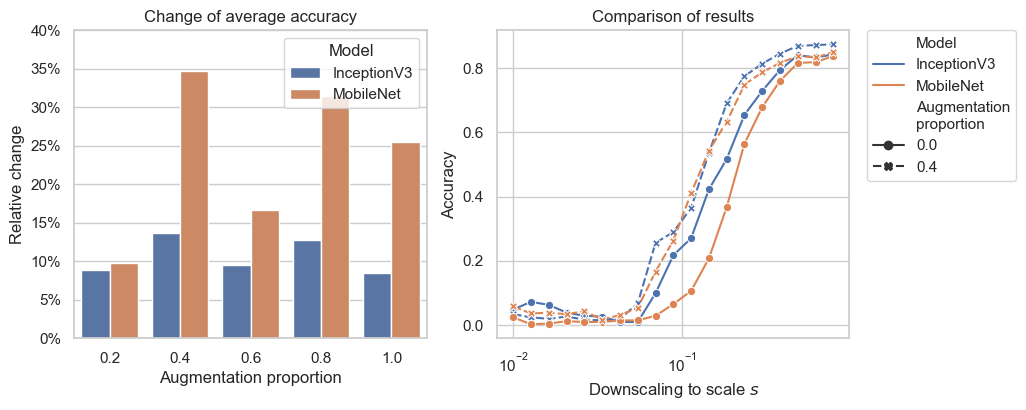

In [91]:
transformation_name = 'downscale'
parameters, df0, dfs = load_dataframes(transformation_name)

result_df = get_average_changes(df0, dfs, True, True)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
plot_changes(result_df, 'Accuracy', 'Relative change', 'Change of average accuracy', axes[0], True)
plot_trajectories(
    df0, 
    dfs[1], 
    0.4, 
    axes[1],  
    scale='log',
    title='Comparison of results', 
    xlabel='Downscaling to scale $s$',
    x=transformation_name, 
    y='Accuracy')
plt.show()

#### Rotation

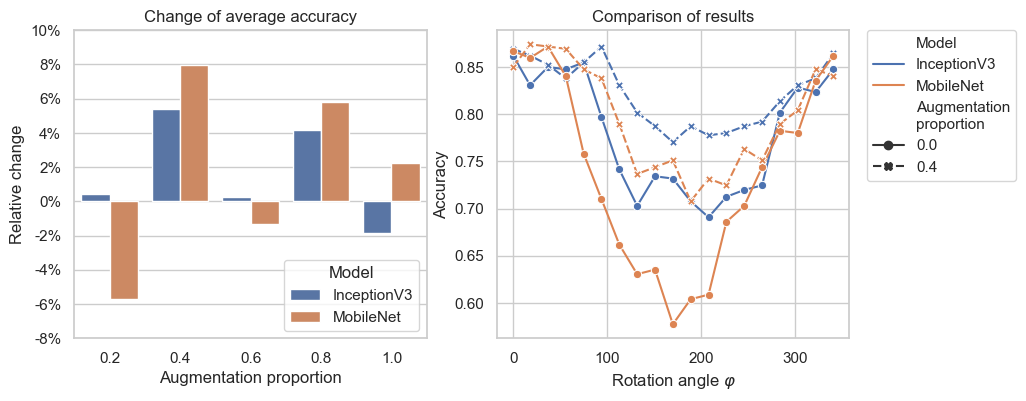

In [92]:
transformation_name = 'rotation'
parameters, df0, dfs = load_dataframes(transformation_name)

result_df = get_average_changes(df0, dfs, True, True)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
plot_changes(result_df, 'Accuracy', 'Relative change', 'Change of average accuracy', axes[0], True)
plot_trajectories(
    df0, 
    dfs[1], 
    0.4, 
    axes[1],  
    title='Comparison of results', 
    xlabel='Rotation angle $\\varphi$',
    x=transformation_name, 
    y='Accuracy')
plt.show()